In [18]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

from sklearn.tree import DecisionTreeClassifier



In [19]:
df = pd.read_csv("wine.csv")



In [20]:
df.columns


Index(['Wine', 'Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols',
       'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue',
       'OD', 'Proline'],
      dtype='object')

In [21]:
X=df.iloc[:,1:]
y=df.iloc[:,:1]

In [22]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42)

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

test_scores=[]
train_scores=[]
n=100

for i in range(1,n):
    y_pred=[]
    model=DecisionTreeClassifier(criterion="gini",splitter="best",max_depth=i)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    test_scores.append(accuracy_score(y_test,y_pred))
    y_train_pred=model.predict(X_train)
    train_scores.append(accuracy_score(y_train,y_train_pred))



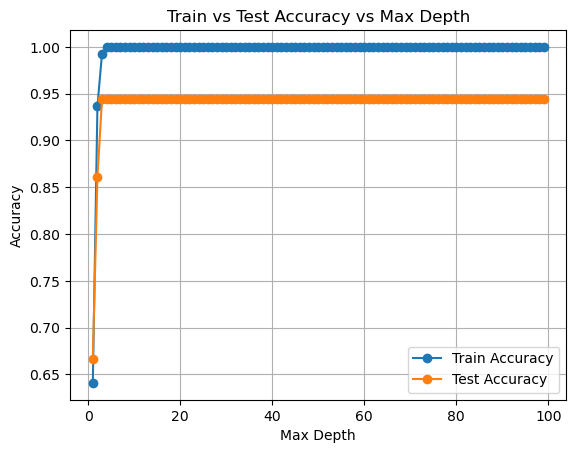

In [24]:
depths=range(1,n)

plt.plot(depths, train_scores, marker='o', label="Train Accuracy")
plt.plot(depths, test_scores, marker='o', label="Test Accuracy")

plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Train vs Test Accuracy vs Max Depth")
plt.legend()
plt.grid(True)
plt.show()



In [25]:
#training useing the most optimal max_depth i.e 3
# y_pred=[]
model=DecisionTreeClassifier(criterion="gini",splitter="best",max_depth=3)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("testing accuracy:",(accuracy_score(y_test,y_pred)))
y_train_pred=model.predict(X_train) 
print("training accuracy:",(model.score(X_train,y_train)))

testing accuracy: 0.9444444444444444
training accuracy: 0.9929577464788732


**California**

In [26]:
df= pd.read_csv("california.csv")

In [27]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [28]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df["ocean_proximity"]=le.fit_transform(df["ocean_proximity"])


In [29]:

df.head()
df.shape

(20640, 10)

In [30]:
y=df["median_house_value"]
X=df.drop("median_house_value", axis=1)

X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,3


In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.2,random_state=42
)

In [32]:
from sklearn.tree import DecisionTreeRegressor
scores=[]
train_scores=[]
n=15
for i in range(1,n):
    model=DecisionTreeRegressor(max_depth=i)
    model.fit(X_train,y_train)
    scores.append(model.score(X_test,y_test))
    train_scores.append(model.score(X_train,y_train))

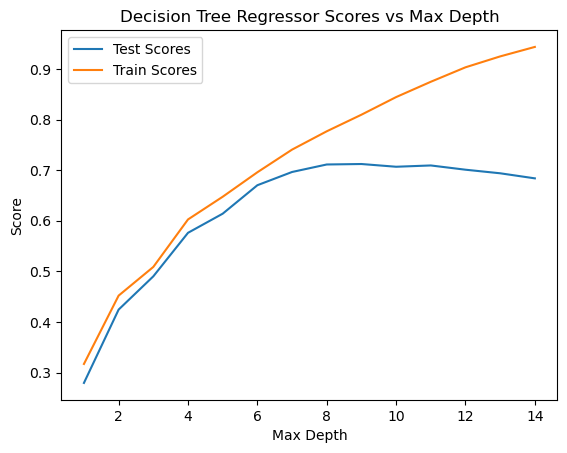

In [33]:
depth=range(1,n)
plt.plot(depth,scores, label='Test Scores')
plt.plot(depth,train_scores, label='Train Scores')
plt.xlabel("Max Depth")
plt.ylabel("Score")
plt.title("Decision Tree Regressor Scores vs Max Depth")
plt.legend()
plt.show()

In [34]:

optimal_max_depth = 9
model_pruned = DecisionTreeRegressor(max_depth=optimal_max_depth)
model_pruned.fit(X_train, y_train)


test_score_pruned = model_pruned.score(X_test, y_test)
train_score_pruned = model_pruned.score(X_train, y_train)


print(f"Test Score: {test_score_pruned:.4f}")
print(f"Train Score: {train_score_pruned:.4f}")

Test Score: 0.7114
Train Score: 0.8095
